In [59]:
#STUDENT NUMBER : C22041684
#NAME : CHETANYA BHANDAWAT

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from pandas._libs.algos import diff_2d
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix

# **DATA PREPROCESSING**

**Get Data**

In [4]:
df = pd.read_csv('CW1_data_202223.csv')

pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

In [5]:
print('\n---Information of the Car Insurance dataset --- \n')
print(df.info())
print('\n ---Column names of the dataset --- \n', df.columns)


---Information of the Car Insurance dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB
None

 ---Column names of the dataset --- 
 Index(['id', 'Gender', 'Age', 'HasDrivingLice

In [6]:
# Look at the first 5 lines of the dataset
print('\nBelow is the first 5 lines of the dataset......\n', df.head(5))


Below is the first 5 lines of the dataset......
        id  Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge PastAccident AnnualPremium  SalesChannelID  DaysSinceCreated  Result
0  332804  Female  39.0                1.0      15.0     0.0   1-2 Year          NaN    £2,645.30               55               227       1
1  116249    Male  38.0                1.0      11.0     NaN   1-2 Year          NaN    £1,151.90               26                29       0
2  255006    Male  22.0                1.0      30.0     NaN   < 1 Year          NaN    £2,265.90              152               166       0
3  317475  Female  23.0                1.0       NaN     NaN   < 1 Year          NaN    £1,456.60              151               277       0
4  344213    Male  56.0                1.0      48.0     0.0  > 2 Years          NaN      £131.50              154               155       0


In [7]:
# Get the statistics of the dataset. Note it only show the results for features with neumerical values
print('\nBelow is the statistics of the dataset......\n\n', df.describe())


Below is the statistics of the dataset......

                   id            Age  HasDrivingLicense       RegionID         Switch  SalesChannelID  DaysSinceCreated         Result
count  304887.000000  274339.000000      274399.000000  274334.000000  152557.000000   304887.000000     304887.000000  304887.000000
mean   190594.098072      38.832561           0.997853      26.408892       0.458281      111.966591        154.272609       0.121970
std    110022.144283      15.504062           0.046281      13.213345       0.498258       54.230069         83.642389       0.327251
min         1.000000      20.000000           0.000000       0.000000       0.000000        1.000000         10.000000       0.000000
25%     95342.500000      25.000000           1.000000      15.000000       0.000000       26.000000         82.000000       0.000000
50%    190639.000000      36.000000           1.000000      28.000000       0.000000      131.000000        154.000000       0.000000
75%    285785.

In [8]:
print('The shape of the dataset is', df.shape)

The shape of the dataset is (304887, 12)


**Removing Features that are not relevant to Modelling**

In [9]:
try:
  df.drop(['id'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

print(df.head(10))

   Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge PastAccident AnnualPremium  SalesChannelID  DaysSinceCreated  Result
0  Female  39.0                1.0      15.0     0.0   1-2 Year          NaN    £2,645.30               55               227       1
1    Male  38.0                1.0      11.0     NaN   1-2 Year          NaN    £1,151.90               26                29       0
2    Male  22.0                1.0      30.0     NaN   < 1 Year          NaN    £2,265.90              152               166       0
3  Female  23.0                1.0       NaN     NaN   < 1 Year          NaN    £1,456.60              151               277       0
4    Male  56.0                1.0      48.0     0.0  > 2 Years          NaN      £131.50              154               155       0
5    Male  30.0                1.0      18.0     NaN        NaN          NaN    £1,755.90              152                92       0
6     NaN  48.0                1.0      28.0     0.0   1-2 Year      

**Dealing with Missing Values**

In [10]:
df.isna().sum()   

Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

**1. Get rid of the instances (data points) that contain missing values.**

In [11]:
df2 = df.dropna(subset=['HasDrivingLicense', 'RegionID', 'VehicleAge']) # delete all instances that have missing values for the features of HasDrivingLicense, RegionID, and VehicleAge

**2. Get rid of the whole attribute.**

In [12]:
try:
  df2.drop(['Switch', 'PastAccident'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\3297725372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Switch', 'PastAccident'], axis=1, inplace = True)


**3. Set the missing values to some value**

In [13]:
median = df2["Age"].median() 
df2["Age"].fillna(median, inplace=True)

C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\3114856826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age"].fillna(median, inplace=True)


**4. Use Imputation Methods**

In [14]:
imputer = SimpleImputer(strategy="most_frequent")
df2.Gender = imputer.fit_transform(df2['Gender'].values.reshape(-1,1))[:,0]


C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\4198901738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Gender = imputer.fit_transform(df2['Gender'].values.reshape(-1,1))[:,0]


In [15]:
df2.isna().sum()

Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
VehicleAge           0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64

**Looking For Outliers in Age and Removing them**

<AxesSubplot: >

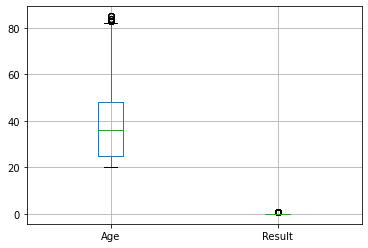

In [16]:
# print(df2[['Age','HasDrivingLicense']].describe())
df2[['Age','Result']].boxplot()

In [17]:
# finding the 1st quartile
q1 = np.quantile(df2.Age, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df2.Age, 0.75)
med = np.median(df2.Age)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

23.0 82.5 -9.5


In [18]:
outliers = df2.Age[(df2.Age <= lower_bound) | (df2.Age >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:18361     83.0
40904     83.0
41814     85.0
48013     85.0
55455     83.0
63876     85.0
111879    84.0
114257    83.0
123440    83.0
184159    85.0
191244    83.0
202615    83.0
238411    84.0
258127    83.0
259033    85.0
274230    84.0
289251    84.0
Name: Age, dtype: float64


In [20]:
df2.drop(df2[df2['Age'] >= 83].index, inplace = True)

C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\3624783533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['Age'] >= 83].index, inplace = True)


**Converting AnnualPremium String Data Type to Float Data Type**

In [21]:
df2['AnnualPremium'] = df2['AnnualPremium'].str.replace('£', '')
df2['AnnualPremium'] = df2['AnnualPremium'].replace(',','', regex=True)
df2['AnnualPremium'] = df2['AnnualPremium'].astype(float)
df2.describe()

C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\783103336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AnnualPremium'] = df2['AnnualPremium'].str.replace('£', '')
C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\783103336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AnnualPremium'] = df2['AnnualPremium'].replace(',','', regex=True)
C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\783103336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Age,HasDrivingLicense,RegionID,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
count,222108.000000,222108.000000,222108.000000,222108.000000,222108.000000,222108.000000,222108.000000
mean,38.553861,0.997848,26.406001,1529.141018,112.005083,154.254331,0.121508
std,14.729571,0.046341,13.208726,862.676544,54.200820,83.688841,0.326718
min,20.000000,0.000000,0.000000,131.500000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,1222.200000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,1583.600000,131.000000,154.000000,0.000000
75%,48.000000,1.000000,35.000000,1970.812500,152.000000,227.000000,0.000000
max,82.000000,1.000000,52.000000,27008.250000,163.000000,299.000000,1.000000


**Feature Scaling(Standardization(z-score))**

In [22]:
standard_scale = StandardScaler()   # to default 0 mean and 1 standard deviation
df2['Age'] = standard_scale.fit_transform(df2[['Age']])
df2['AnnualPremium'] = standard_scale.fit_transform(df2[['AnnualPremium']])
df2['DaysSinceCreated'] = standard_scale.fit_transform(df2[['DaysSinceCreated']])
df2['RegionID'] = standard_scale.fit_transform(df2[['RegionID']])
df2['SalesChannelID'] = standard_scale.fit_transform(df2[['SalesChannelID']])
df2.head()

C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\1468476425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = standard_scale.fit_transform(df2[['Age']])
C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\1468476425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AnnualPremium'] = standard_scale.fit_transform(df2[['AnnualPremium']])
C:\Users\c22041684\AppData\Local\Temp\ipykernel_24888\1468476425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Gender,Age,HasDrivingLicense,RegionID,VehicleAge,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,Female,0.030289,1.0,-0.863522,1-2 Year,1.293835,-1.051741,0.869242,1
1,Male,-0.037602,1.0,-1.166353,1-2 Year,-0.437292,-1.586789,-1.496670,0
2,Male,-1.123855,1.0,0.272093,< 1 Year,0.854040,0.737904,0.140350,0
4,Male,1.184432,1.0,1.634832,> 2 Years,-1.620125,0.774804,0.008910,0
6,Male,0.641306,1.0,0.120678,1-2 Year,1.145170,0.221306,0.403229,0


**ENCODING CATEGORICAL FEATURES**

**One Hot Encoding**

In [23]:
df4 = df2[['Gender', 'VehicleAge']].dropna()
#print(titanic1.info())
print('\n---The original data---\n', df4.head())

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(df4)

print('\n', enc.categories_)

df6 = pd.DataFrame(enc.transform(df4))
df6.columns = np.concatenate(enc.categories_).ravel().tolist()
print('\n---The data after one hot encoding---\n', df6.head(5))


---The original data---
    Gender VehicleAge
0  Female   1-2 Year
1    Male   1-2 Year
2    Male   < 1 Year
4    Male  > 2 Years
6    Male   1-2 Year

 [array(['Female', 'Male'], dtype=object), array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)]


C:\Users\c22041684\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



---The data after one hot encoding---
    Female  Male  1-2 Year  < 1 Year  > 2 Years
0     1.0   0.0       1.0       0.0        0.0
1     0.0   1.0       1.0       0.0        0.0
2     0.0   1.0       0.0       1.0        0.0
3     0.0   1.0       0.0       0.0        1.0
4     0.0   1.0       1.0       0.0        0.0


**Merging the DataFrames to One**

In [24]:
df5 = df2[['Age','AnnualPremium','HasDrivingLicense','DaysSinceCreated','RegionID','SalesChannelID','Result']].dropna()
df6.set_index(df5.index,inplace=True)
df6 = pd.concat([df6,df5], axis=1)

df6.head()


,Female,Male,1-2 Year,< 1 Year,> 2 Years,Age,AnnualPremium,HasDrivingLicense,DaysSinceCreated,RegionID,SalesChannelID,Result
0,1.0,0.0,1.0,0.0,0.0,0.030289,1.293835,1.0,0.869242,-0.863522,-1.051741,1
1,0.0,1.0,1.0,0.0,0.0,-0.037602,-0.437292,1.0,-1.496670,-1.166353,-1.586789,0
2,0.0,1.0,0.0,1.0,0.0,-1.123855,0.854040,1.0,0.140350,0.272093,0.737904,0
4,0.0,1.0,0.0,0.0,1.0,1.184432,-1.620125,1.0,0.008910,1.634832,0.774804,0
6,0.0,1.0,1.0,0.0,0.0,0.641306,1.145170,1.0,0.403229,0.120678,0.221306,0


# **DATA EXPLORATION**

**Correlation**

                     Female      Male  1-2 Year  < 1 Year  > 2 Years       Age  AnnualPremium  HasDrivingLicense  DaysSinceCreated  RegionID  SalesChannelID    Result
Female             1.000000 -1.000000 -0.136667  0.153793  -0.039678 -0.126974      -0.002693           0.017431          0.002907 -0.001735        0.103892 -0.048771
Male              -1.000000  1.000000  0.136667 -0.153793   0.039678  0.126974       0.002693          -0.017431         -0.002907  0.001735       -0.103892  0.048771
1-2 Year          -0.136667  0.136667  1.000000 -0.919069  -0.220154  0.657013      -0.003104          -0.038608         -0.004415  0.038068       -0.508793  0.163092
< 1 Year           0.153793 -0.153793 -0.919069  1.000000  -0.182090 -0.746357      -0.022186           0.040491          0.003172 -0.044620        0.571467 -0.208774
> 2 Years         -0.039678  0.039678 -0.220154 -0.182090   1.000000  0.208110       0.062661          -0.003895          0.003164  0.015464       -0.145037  0.10983

<AxesSubplot: >

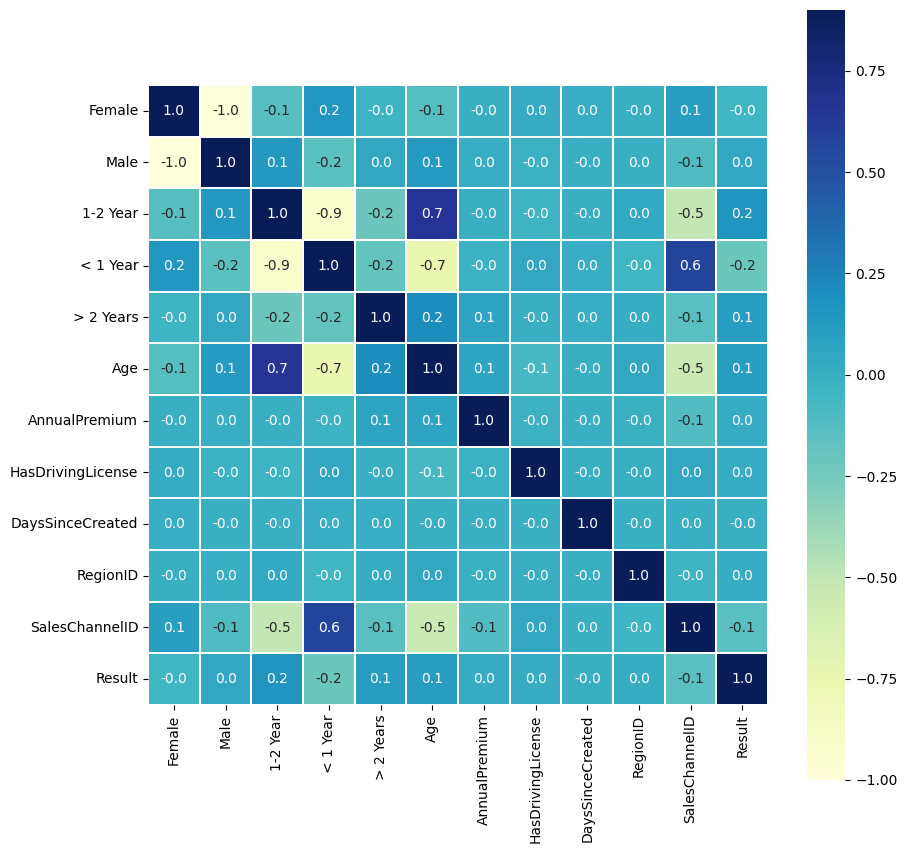

In [28]:
corr_matrix = df6.corr()
print(corr_matrix)

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True, linewidths=0.3, cmap="YlGnBu", fmt=".1f")

<AxesSubplot: >

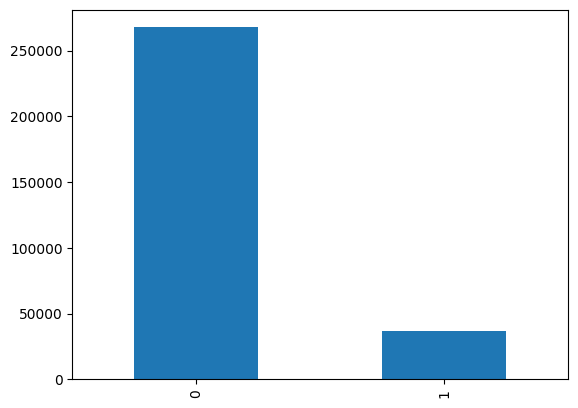

In [29]:
df['Result'].value_counts().plot(kind='bar')

In [30]:
count_1 = df2[df2['Result']==1].value_counts().sum()
totalResult = df2['Result'].value_counts().sum()
print("The percentage of positive result is: ",round(count_1*100/totalResult),"%")

The percentage of positive result is:  12 %


Text(0, 0.5, 'Frequency of Interest')

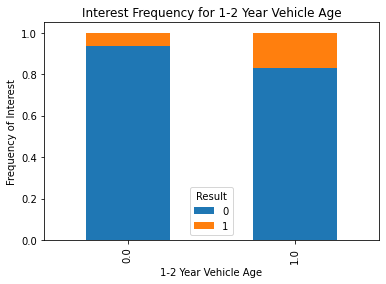

In [31]:
%matplotlib inline
table = pd.crosstab(df6['1-2 Year'],df6['Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Interest Frequency for 1-2 Year Vehicle Age')
plt.xlabel('1-2 Year Vehicle Age')
plt.ylabel('Frequency of Interest')


Text(0, 0.5, 'Frequency of Interest')

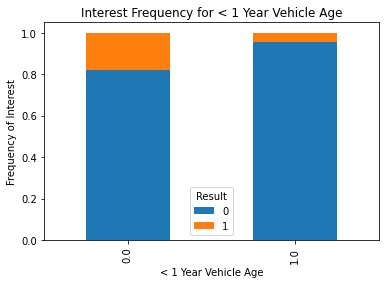

In [32]:
%matplotlib inline
table = pd.crosstab(df6['< 1 Year'],df6['Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Interest Frequency for < 1 Year Vehicle Age')
plt.xlabel('< 1 Year Vehicle Age')
plt.ylabel('Frequency of Interest')

Text(0, 0.5, 'Frequency of Interest')

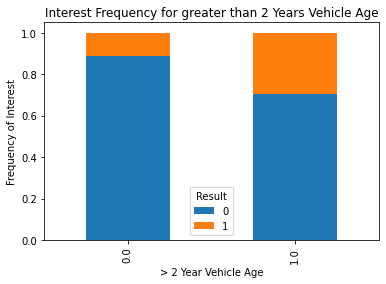

In [33]:
%matplotlib inline
table = pd.crosstab(df6['> 2 Years'],df6['Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Interest Frequency for greater than 2 Years Vehicle Age')
plt.xlabel('> 2 Year Vehicle Age')
plt.ylabel('Frequency of Interest')

Text(0, 0.5, 'Frequency of Interest')

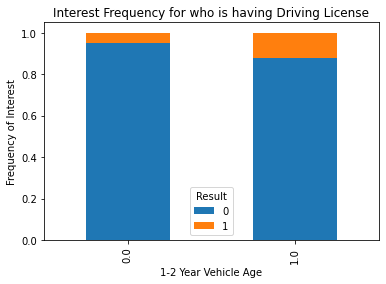

In [34]:
%matplotlib inline
table = pd.crosstab(df6['HasDrivingLicense'],df6['Result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Interest Frequency for who is having Driving License')
plt.xlabel('1-2 Year Vehicle Age')
plt.ylabel('Frequency of Interest')

# **MODEL IMPLEMENTATION AND PERFORMANCE EVALUATION**

**Splitting the Data to Traning and Testing Data and Balancing the data using SMOTE**

In [35]:
X=df6.drop('Result', axis=1)
y=df6['Result']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train,y_train)

**DECISION TREE**

In [36]:
DT = DecisionTreeClassifier(random_state = 100,max_depth=3, min_samples_leaf=5)
DT_predict = DT.fit(X_res,y_res).predict(X_test)

In [37]:
classification_report(y_test, DT_predict)

'              precision    recall  f1-score   support\n\n           0       0.96      0.55      0.70     58585\n           1       0.20      0.81      0.32      8048\n\n    accuracy                           0.59     66633\n   macro avg       0.58      0.68      0.51     66633\nweighted avg       0.86      0.59      0.66     66633\n'

In [38]:
confusion_matrix(y_test, DT_predict)

array([[32462, 26123],
       [ 1509,  6539]], dtype=int64)

In [39]:
accuracy_score(y_test, DT_predict)

0.5853105818438311

In [40]:
recall_score(y_test, DT_predict)

0.8125

In [41]:
precision_score(y_test, DT_predict)

0.20020206968342416

In [42]:
f1_score(y_test, DT_predict)

0.3212478506509457

**K-NEAREST NEIGHBORS**

In [43]:
KNN = KNeighborsClassifier(n_neighbors=11, metric='minkowski',p=2)
KNN_predictions = KNN.fit(X_res,y_res).predict(X_test)

In [44]:
classification_report(y_test, KNN_predictions)

'              precision    recall  f1-score   support\n\n           0       0.92      0.66      0.77     58585\n           1       0.19      0.58      0.28      8048\n\n    accuracy                           0.65     66633\n   macro avg       0.55      0.62      0.53     66633\nweighted avg       0.83      0.65      0.71     66633\n'

In [45]:
confusion_matrix(y_test, KNN_predictions)

array([[38608, 19977],
       [ 3413,  4635]], dtype=int64)

In [46]:
accuracy_score(y_test, KNN_predictions)

0.6489727312292708

In [47]:
recall_score(y_test, KNN_predictions)

0.5759194831013916

In [48]:
precision_score(y_test, KNN_predictions)

0.18832276938078985

In [49]:
f1_score(y_test, KNN_predictions)

0.2838334353949786

**Random Forest**

In [51]:
RF = RandomForestClassifier(random_state=1)
RF_predict = RF.fit(X_res, y_res).predict(X_test)

In [52]:
classification_report(y_test, RF_predict)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.90     58585\n           1       0.26      0.22      0.24      8048\n\n    accuracy                           0.83     66633\n   macro avg       0.58      0.57      0.57     66633\nweighted avg       0.82      0.83      0.82     66633\n'

In [53]:
confusion_matrix(y_test,RF_predict)

array([[53461,  5124],
       [ 6257,  1791]], dtype=int64)

In [54]:
accuracy_score(y_test,RF_predict)

0.82919874536641

In [55]:
recall_score(y_test,RF_predict)

0.22253976143141152

In [56]:
precision_score(y_test,RF_predict)

0.25900216919739694

In [57]:
f1_score(y_test,RF_predict)

0.23939049655817682